### Practical Notebook
Here we import the required libraries and data sets for training.

In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, balanced_accuracy_score, confusion_matrix

In [2]:
# Load train data
X_amp_train = np.load("Xtrain_amp.npy")
y_amp_train = np.load("ytrain_amp.npy")

In [3]:
# Load test data
X_amp_test = np.load("Xtest_amp.npy")
y_amp_test = np.load("ytest_amp.npy")

In [4]:
# Load train data
X_mel_train = np.load("Xtrain_mel.npy")
y_mel_train = np.load("ytrain_mel.npy")

In [5]:
# Load test data
X_mel_test = np.load("Xtest_mel.npy")
y_mel_test = np.load("ytest_mel.npy")

In [6]:
# Flatten spectrogram features
X_mel_train_flat = X_mel_train.reshape(X_mel_train.shape[0], -1)
X_mel_test_flat = X_mel_test.reshape(X_mel_test.shape[0], -1)

### Part A: Feature Engineering, Baseline Models

#### Raw amplitude features

Here we apply PCA to our raw amplitude features in order to extract the 500 most significant components.

In [7]:
pca = PCA(n_components=500)

# standardize data
stand_X_amp_train = (X_amp_train - np.mean(X_amp_train)) / np.std(X_amp_train)
stand_X_amp_test = (X_amp_test - np.mean(X_amp_test)) / np.std(X_amp_test)

# create our PCA object that will calculate the first 500 components.
X_amp_train_reduced = pca.fit_transform(stand_X_amp_train)
X_amp_test_reduced = pca.transform(stand_X_amp_test)

# save reduced data as pickle
with open("X_amp_train_reduced.pickle", "wb") as file:
    pickle.dump(X_amp_train_reduced, file)
with open("X_amp_test_reduced.pickle", "wb") as file:
    pickle.dump(X_amp_test_reduced, file)

Once our data set is reduced in dimension, we use it to train a logistic regression classifier.

In [8]:
# load reduced data from pickle
with open('X_amp_train_reduced.pickle', "rb") as file:
    X_amp_train_reduced = pickle.load(file)
with open('X_amp_test_reduced.pickle', "rb") as file:
    X_amp_test_reduced = pickle.load(file)

In [9]:
# create logistic regression classifier
amp_lr_model = LogisticRegression(penalty='l2', tol=0.0001, max_iter=1000)

# fit classifier
amp_lr_model.fit(X_amp_train_reduced, y_amp_train)

# save classifier as pickle
with open("amp_lr_model.pickle", "wb") as file:
    pickle.dump(amp_lr_model, file)

With our trained classifier, we make predictions and calculate the over all and per-class accuracies.

In [10]:
# load classifier from pickle
with open('amp_lr_model.pickle', "rb") as file:
    amp_lr_model = pickle.load(file)

AMP LR Model Mean Accuracy:  0.185
AMP LR Model Per-class Accuracies: [0.193 0.026 0.602 0.052 0.087 0.129 0.067 0.102 0.119 0.147]


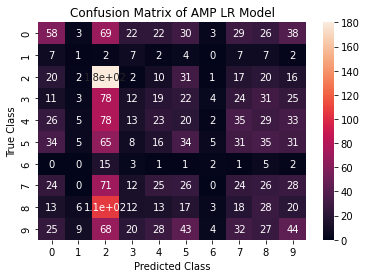

In [11]:
# make predictions
y_amp_preds = amp_lr_model.predict(X_amp_test_reduced)

# calculate accuracy and balanced accuracy
print("AMP LR Model Mean Accuracy: ", round(accuracy_score(y_amp_preds, y_amp_test), 3))

# create confusion matrix 
cfm = confusion_matrix(y_amp_test, y_amp_preds)

# calculate per-class accuracies from confusion matrix 
class_accs = np.round(cfm.diagonal() / cfm.sum(axis=1), 3)
print("AMP LR Model Per-class Accuracies: "+str(class_accs))

# plot confusion matrix
sns.heatmap(cfm, annot=True)
plt.title("Confusion Matrix of AMP LR Model")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

#### Mel amplitude features

Here we do the same procedure for our Mel spectogram features

In [12]:
# standardize data
stand_X_mel_train_flat = (X_mel_train_flat - np.mean(X_mel_train_flat)) / np.std(X_mel_train_flat)
stand_X_mel_test_flat = (X_mel_test_flat - np.mean(X_mel_test_flat)) / np.std(X_mel_test_flat)

# create our PCA object that will calculate the first 500 components.
X_mel_train_reduced = pca.fit_transform(stand_X_mel_train_flat)
X_mel_test_reduced = pca.transform(stand_X_mel_test_flat)

# save reduced data as pickle
with open("X_mel_train_reduced.pickle", "wb") as file:
    pickle.dump(X_mel_train_reduced, file)
with open("X_mel_test_reduced.pickle", "wb") as file:
    pickle.dump(X_mel_test_reduced, file)

In [13]:
# load reduced data from pickle
with open('X_mel_train_reduced.pickle', "rb") as file:
    X_mel_train_reduced = pickle.load(file)
with open('X_mel_test_reduced.pickle', "rb") as file:
    X_mel_test_reduced = pickle.load(file)

In [14]:
# create logistic regression classifier
mel_lr_model = LogisticRegression(penalty='l2', tol=0.0001, max_iter=3000)

# fit classifier
mel_lr_model.fit(X_mel_train_reduced, y_mel_train)

# save classifier as pickle
with open("mel_lr_model.pickle", "wb") as file:
    pickle.dump(mel_lr_model, file)

In [15]:
# load classifier from pickle
with open('mel_lr_model.pickle', "rb") as file:
    mel_lr_model = pickle.load(file)

Mel LR Model Mean Accuracy:  0.259
Mel LR Model Per-class Accuracies: [0.233 0.462 0.017 0.183 0.227 0.284 0.433 0.093 0.953 0.127]


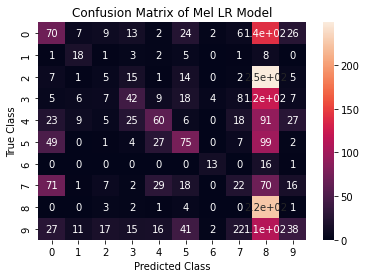

In [16]:
# make predictions
y_mel_preds = mel_lr_model.predict(X_mel_test_reduced)

# calculate accuracy and balanced accuracy
print("Mel LR Model Mean Accuracy: ", round(accuracy_score(y_mel_preds, y_mel_test), 3))

# create confusion matrix 
cfm = confusion_matrix(y_mel_test, y_mel_preds)

# calculate per-class accuracies from confusion matrix 
class_accs = np.round(cfm.diagonal() / cfm.sum(axis=1), 3)
print("Mel LR Model Per-class Accuracies: "+str(class_accs))

# plot confusion matrix
sns.heatmap(cfm, annot=True)
plt.title("Confusion Matrix of Mel LR Model")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

### Part B: More Modeling

#### B1: First Step
##### Random Forest Classifier on raw amplitude features
Here we use a Random Forest Classifier on our raw amplitude features and calculate accuracies.

In [17]:
amp_rf_model = RandomForestClassifier(n_estimators=200, n_jobs=-1, class_weight="balanced")

amp_rf_model.fit(X_amp_train_reduced, y_amp_train)

# save classifier as pickle
with open("amp_rf_model.pickle", "wb") as file:
    pickle.dump(amp_rf_model, file)

AMP RF Model Mean Accuracy:  0.249
AMP RF Model Per-class Accuracies: [0.263 0.    0.702 0.026 0.14  0.375 0.033 0.123 0.208 0.12 ]


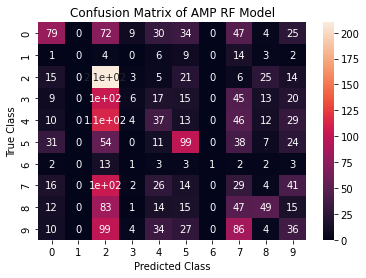

In [18]:
# load classifier from pickle
with open('amp_rf_model.pickle', "rb") as file:
    amp_rf_model = pickle.load(file)

# make predictions
y_amp_preds = amp_rf_model.predict(X_amp_test_reduced)

# calculate accuracy and balanced accuracy
print("AMP RF Model Mean Accuracy: ", round(accuracy_score(y_amp_preds, y_amp_test), 3))

# create confusion matrix 
cfm = confusion_matrix(y_amp_test, y_amp_preds)

# calculate per-class accuracies from confusion matrix 
class_accs = np.round(cfm.diagonal() / cfm.sum(axis=1), 3)
print("AMP RF Model Per-class Accuracies: "+str(class_accs))

# plot confusion matrix
sns.heatmap(cfm, annot=True)
plt.title("Confusion Matrix of AMP RF Model")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

##### Random Forest Classifier on raw amplitude features
Here we use a Random Forest Classifier on our Mel spectogram features and calculate accuracies.

In [19]:
mel_rf_model = RandomForestClassifier(n_estimators=200, n_jobs=-1, class_weight="balanced")

mel_rf_model.fit(X_mel_train_reduced, y_mel_train)

# save classifier as pickle
with open("mel_rf_model.pickle", "wb") as file:
    pickle.dump(mel_rf_model, file)

Mel RF Model Mean Accuracy:  0.337
Mel RF Model Per-class Accuracies: [0.207 0.308 0.237 0.498 0.22  0.383 0.167 0.356 0.449 0.423]


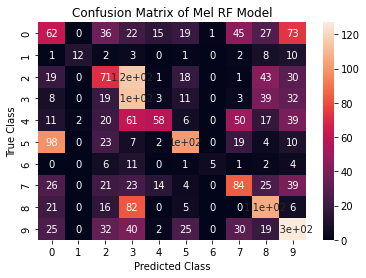

In [20]:
# load classifier from pickle
with open('mel_rf_model.pickle', "rb") as file:
    mel_rf_model = pickle.load(file)

# make predictions
y_mel_preds = mel_rf_model.predict(X_mel_test_reduced)

# calculate accuracy and balanced accuracy
print("Mel RF Model Mean Accuracy: ", round(accuracy_score(y_mel_preds, y_mel_test), 3))

# create confusion matrix 
cfm = confusion_matrix(y_mel_test, y_mel_preds)

# calculate per-class accuracies from confusion matrix 
class_accs = np.round(cfm.diagonal() / cfm.sum(axis=1), 3)
print("Mel RF Model Per-class Accuracies: "+str(class_accs))

# plot confusion matrix
sns.heatmap(cfm, annot=True)
plt.title("Confusion Matrix of Mel RF Model")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

#### B2: More Complicated Models–Hyperparameter Tuning and Validation
##### Hyperparameter grid search on Random Forest Classifier for raw amplitude features.

In [21]:
# these are the settings that we will tune: 'C', 'kernel'
param_grid = {'n_estimators' : [360, 400, 440, 480, 520]}

# instantiate our template model
amp_rf = RandomForestClassifier()

# instantiate our gridsearch estimator - cv=None defaults to the 5-fold cross validation
amp_rf_cv = GridSearchCV(estimator=amp_rf, param_grid=param_grid, n_jobs=-1, cv=None, verbose=1)
amp_rf_cv.fit(X_amp_train_reduced, y_amp_train)

# save classifier as pickle
with open("amp_rf_cv.pickle", "wb") as file:
    pickle.dump(amp_rf_cv, file)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


In [22]:
# load classifier from pickle
with open('amp_rf_cv.pickle', "rb") as file:
    amp_rf_cv = pickle.load(file)

# convert our results to a pd.DataFrame
amp_rf_results = pd.DataFrame(amp_rf_cv.cv_results_).sort_values(by=['rank_test_score'])
amp_rf_results.head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_class_weight,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,36.317237,0.904151,0.236709,0.061387,None,320,"{'class_weight': None, 'n_estimators': 320}",0.249325,0.309631,0.244824,0.190090,0.213514,0.241477,0.040349,1
1,42.183400,1.461015,0.248626,0.039558,None,360,"{'class_weight': None, 'n_estimators': 360}",0.249325,0.297930,0.237624,0.209910,0.206306,0.240219,0.033133,2
2,48.383796,0.693696,0.195324,0.013572,None,400,"{'class_weight': None, 'n_estimators': 400}",0.240324,0.292529,0.250225,0.190090,0.222523,0.239138,0.033635,3
4,55.409991,1.669822,0.211773,0.063413,None,480,"{'class_weight': None, 'n_estimators': 480}",0.251125,0.281728,0.249325,0.202703,0.209910,0.238958,0.029131,4
9,61.565759,1.487165,0.215333,0.021162,balanced,440,"{'class_weight': 'balanced', 'n_estimators': 440}",0.231323,0.286229,0.253825,0.208108,0.208108,0.237519,0.029688,5


##### Hyperparameter grid search on Random Forest Classifier for Mel spectogram features.

In [ ]:
# these are the settings that we will tune: 'C', 'kernel'
param_grid = {'n_estimators' : [360, 400, 440, 480, 520]}

# instantiate our template model
mel_rf = RandomForestClassifier()

# instantiate our gridsearch estimator - cv=None defaults to the 5-fold cross validation
mel_rf_cv = GridSearchCV(estimator=mel_rf, param_grid=param_grid, n_jobs=-1, cv=None, verbose=1)
mel_rf_cv.fit(X_mel_train_reduced, y_mel_train)

# save classifier as pickle
with open("mel_rf_cv.pickle", "wb") as file:
    pickle.dump(mel_rf_cv, file)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


In [ ]:
# load classifier from pickle
with open('mel_rf_cv.pickle', "rb") as file:
    mel_rf_cv = pickle.load(file)

# convert our results to a pd.DataFrame
mel_rf_results = pd.DataFrame(mel_rf_cv.cv_results_).sort_values(by=['rank_test_score'])
mel_rf_results.head(5)

##### Hyperparameter grid search on Support Vector Machine for raw amplitude features

In [ ]:
# these are the settings that we will tune: 'C', 'kernel'
param_grid = {'C' : [0.001, 0.01, 0.1, 1.0, 10.0]}

# instantiate our template model
amp_svm = SVC()

# instantiate our gridsearch estimator - cv=None defaults to the 5-fold cross validation
amp_svm_cv = GridSearchCV(estimator=amp_svm, param_grid=param_grid, kernel='rbf' n_jobs=-1, cv=None, verbose=1)
amp_svm_cv.fit(X_amp_train_reduced, y_amp_train)

# save classifier as pickle
with open("amp_svm_cv.pickle", "wb") as file:
    pickle.dump(amp_svm_cv, file)

In [ ]:
# load classifier from pickle
with open('amp_svm_cv.pickle', "rb") as file:
    amp_svm_cv = pickle.load(file)

# convert our results to a pd.DataFrame
amp_svm_cv_results = pd.DataFrame(amp_svm_cv.cv_results_).sort_values(by=['rank_test_score'])
amp_svm_cv_results.head(5)

##### Hyperparameter grid search on Support Vector Machine for Mel spectogram features

In [ ]:
# these are the settings that we will tune: 'C', 'kernel'
param_grid = {'C' : [0.001, 0.01, 0.1, 1.0, 10.0]}

# instantiate our template model
mel_svm = SVC()

# instantiate our gridsearch estimator - cv=None defaults to the 5-fold cross validation
mel_svm_cv = GridSearchCV(estimator=mel_svm, param_grid=param_grid, kernel='rbf' n_jobs=-1, cv=None, verbose=1)
mel_svm_cv.fit(X_mel_train_reduced, y_mel_train)

# save classifier as pickle
with open("mel_svm_cv.pickle", "wb") as file:
    pickle.dump(mel_svm_cv, file)

In [ ]:
# load classifier from pickle
with open('mel_svm_cv.pickle', "rb") as file:
    mel_svm_cv_model = pickle.load(file)

# convert our results to a pd.DataFrame
mel_svm_cv_results = pd.DataFrame(mel_svm_cv.cv_results_).sort_values(by=['rank_test_score'])
mel_svm_cv_results.head(5)